In [134]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.ticker as mticker
plt.style.use('ggplot') 

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.options.display.float_format = '{:.2f}'.format 
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.set_option('display.max_colwidth', None)

In [82]:
df= pd.read_csv('/Users/chanduvamsi/Downloads/customer_shopping_data.csv')

In [83]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [84]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [85]:
df.isna().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [100]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

In [101]:
df['month'] = df['invoice_date'].dt.month

In [102]:
df['year'] = df['invoice_date'].dt.year

In [103]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021


In [105]:
df.describe()

,age,quantity,price,invoice_date,month,year
count,99457.00,99457.00,99457.00,99457,99457.00,99457.00
mean,43.43,3.00,689.26,2022-02-04 02:46:59.783424,6.11,2021.63
min,18.00,1.00,5.23,2021-01-01 00:00:00,1.00,2021.00
25%,30.00,2.00,45.45,2021-07-19 00:00:00,3.00,2021.00
50%,43.00,3.00,203.30,2022-02-05 00:00:00,6.00,2022.00
75%,56.00,4.00,1200.32,2022-08-22 00:00:00,9.00,2022.00
max,69.00,5.00,5250.00,2023-03-08 00:00:00,12.00,2023.00
std,14.99,1.41,941.18,NaN,3.57,0.64


In [107]:
# convert invoice date to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# create year and month columns from invoice date
df['invoice_year'] = df['invoice_date'].dt.year
df['invoice_month'] = df['invoice_date'].dt.strftime('%B')

# create total revenue column
df['total_revenue'] = df['quantity'] * df['price']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,invoice_year,invoice_month,total_revenue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022,2022,August,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021,2021,December,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021,2021,November,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021,2021,May,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021,2021,October,242.40


In [108]:
def format_revenue_with_thousand_separator(x):
    """
        function to format the revenue values with thousand separators
    """
    return "${:,.2f}".format(x)

Analysis and Visualization

In [109]:
gender = df.groupby('gender')['gender'].value_counts().reset_index()
gender

,gender,count
0,Female,59482
1,Male,39975


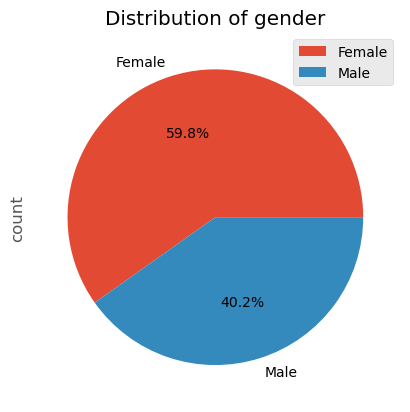

In [110]:
gender.plot.pie(y='count',labels=gender['gender'],autopct='%.1f%%')
plt.title('Distribution of gender')
plt.show()

In [111]:
payment = df.groupby('payment_method')['payment_method'].value_counts().reset_index()
payment

,payment_method,count
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


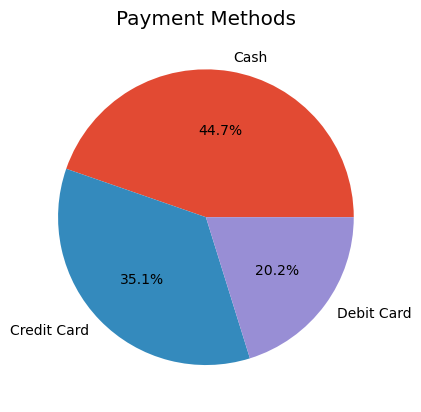

In [112]:
plt.pie(x=payment['count'],labels=payment['payment_method'],autopct='%.1f%%')
plt.title('Payment Methods')
plt.show()

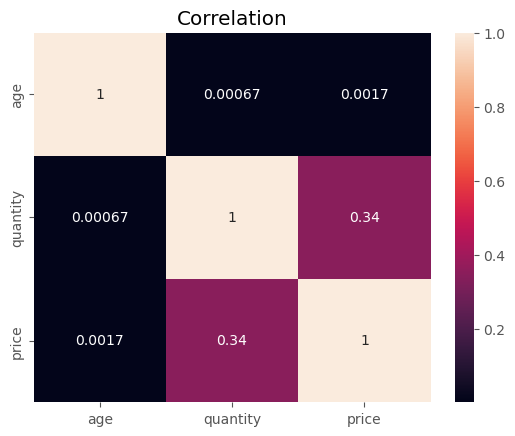

In [98]:
sns.heatmap(data=df.select_dtypes(include='number').corr(),annot=True)
plt.title('Correlation')
plt.show()

In [113]:
year = df.groupby(['year','gender'])['year'].count().reset_index(name='count')
year

,year,gender,count
0,2021,Female,27156
1,2021,Male,18226
2,2022,Female,27192
3,2022,Male,18359
4,2023,Female,5134
5,2023,Male,3390


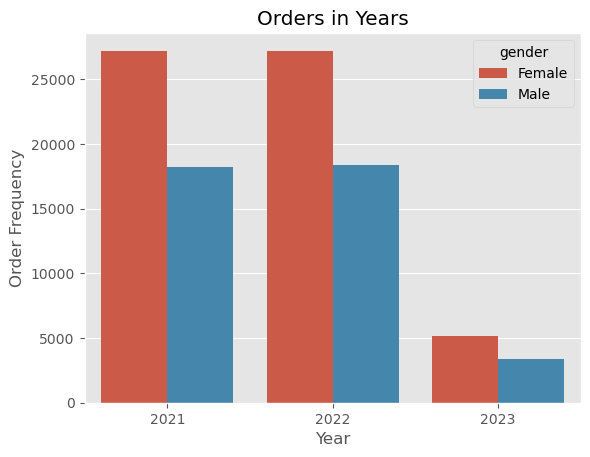

In [114]:
sns.barplot(data=year,x='year',y='count',hue='gender')
plt.xlabel('Year')
plt.ylabel('Order Frequency')
plt.title('Orders in Years')
plt.show()

In [115]:
month = df.groupby(['month','gender'])['month'].count().reset_index(name='count')
month

,month,gender,count
0,1,Female,6923
1,1,Male,4685
2,2,Female,6252
3,2,Male,4230
4,3,Female,5248
5,3,Male,3482
6,4,Female,4481
7,4,Male,3006
8,5,Female,4649
9,5,Male,3048


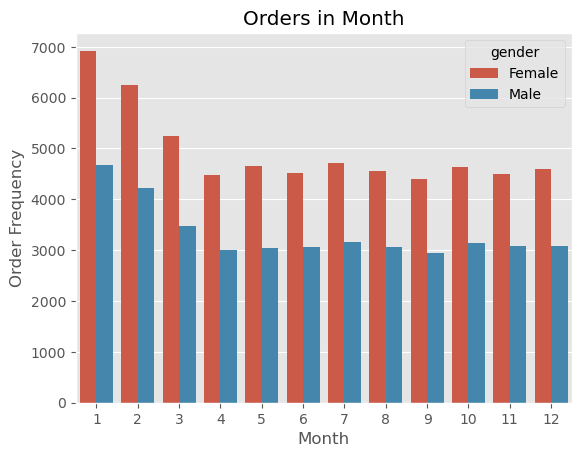

In [ ]:
sns.barplot(data=month,x='month',y='count',hue='gender')
plt.xlabel('Month')
plt.ylabel('Order Frequency')
plt.title('Orders in Month')
plt.show()

In [ ]:
payment_gender = df.groupby(['payment_method','gender'])['payment_method'].value_counts().reset_index()
payment_gender

,payment_method,gender,count
0,Cash,Female,26509
1,Cash,Male,17938
2,Credit Card,Female,21011
3,Credit Card,Male,13920
4,Debit Card,Female,11962
5,Debit Card,Male,8117


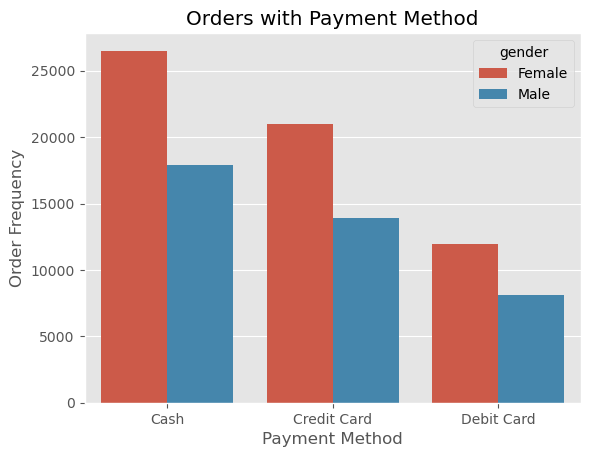

In [ ]:
sns.barplot(data=payment_gender,x='payment_method',y='count',hue='gender')
plt.xlabel('Payment Method')
plt.ylabel('Order Frequency')
plt.title('Orders with Payment Method')
plt.show()

In [ ]:
age = df.groupby(['age','gender'])['age'].value_counts().reset_index()
age.head()

,age,gender,count
0,18,Female,1079
1,18,Male,765
2,19,Female,1133
3,19,Male,803
4,20,Female,1102


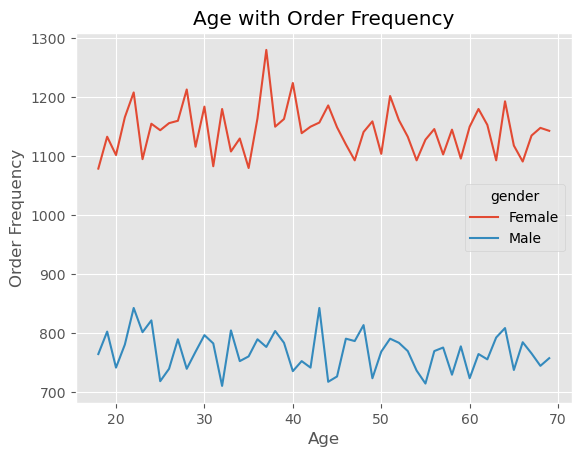

In [ ]:
sns.lineplot(data=age,x='age',y='count',hue='gender')
plt.title('Age with Order Frequency')
plt.xlabel('Age')
plt.ylabel('Order Frequency')
plt.show()

In [ ]:
category = df.groupby(['category','gender'])['category'].value_counts().reset_index()
category

,category,gender,count
0,Books,Female,2906
1,Books,Male,2075
2,Clothing,Female,20652
3,Clothing,Male,13835
4,Cosmetics,Female,9070
5,Cosmetics,Male,6027
6,Food & Beverage,Female,8804
7,Food & Beverage,Male,5972
8,Shoes,Female,5967
9,Shoes,Male,4067


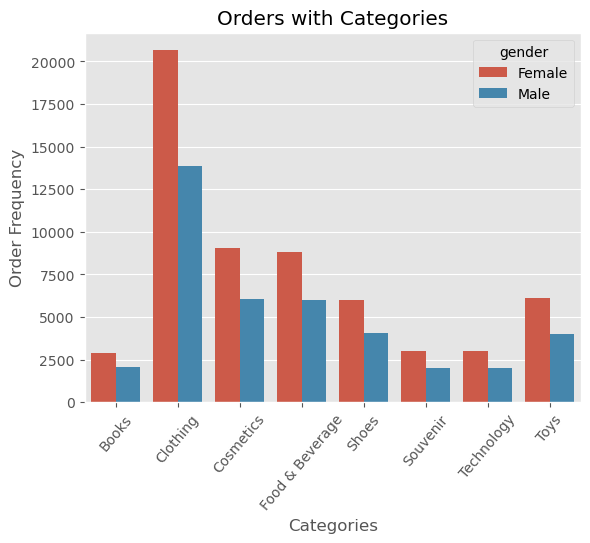

In [ ]:
sns.barplot(data=category,x='category',y='count',hue='gender')
plt.xlabel('Categories')
plt.ylabel('Order Frequency')
plt.title('Orders with Categories')
plt.xticks(rotation=50)
plt.show()

In [ ]:
quantity_year = df.groupby(['year','month'])['quantity'].sum().reset_index()
quantity_year.head()

,year,month,quantity
0,2021,1,11483
1,2021,2,10179
2,2021,3,11383
3,2021,4,11270
4,2021,5,11620


In [ ]:
quantity_year['date'] = quantity_year['year'].astype(str)+ "-"+quantity_year['month'].astype(str)
quantity_year.head()

,year,month,quantity,date
0,2021,1,11483,2021-1
1,2021,2,10179,2021-2
2,2021,3,11383,2021-3
3,2021,4,11270,2021-4
4,2021,5,11620,2021-5


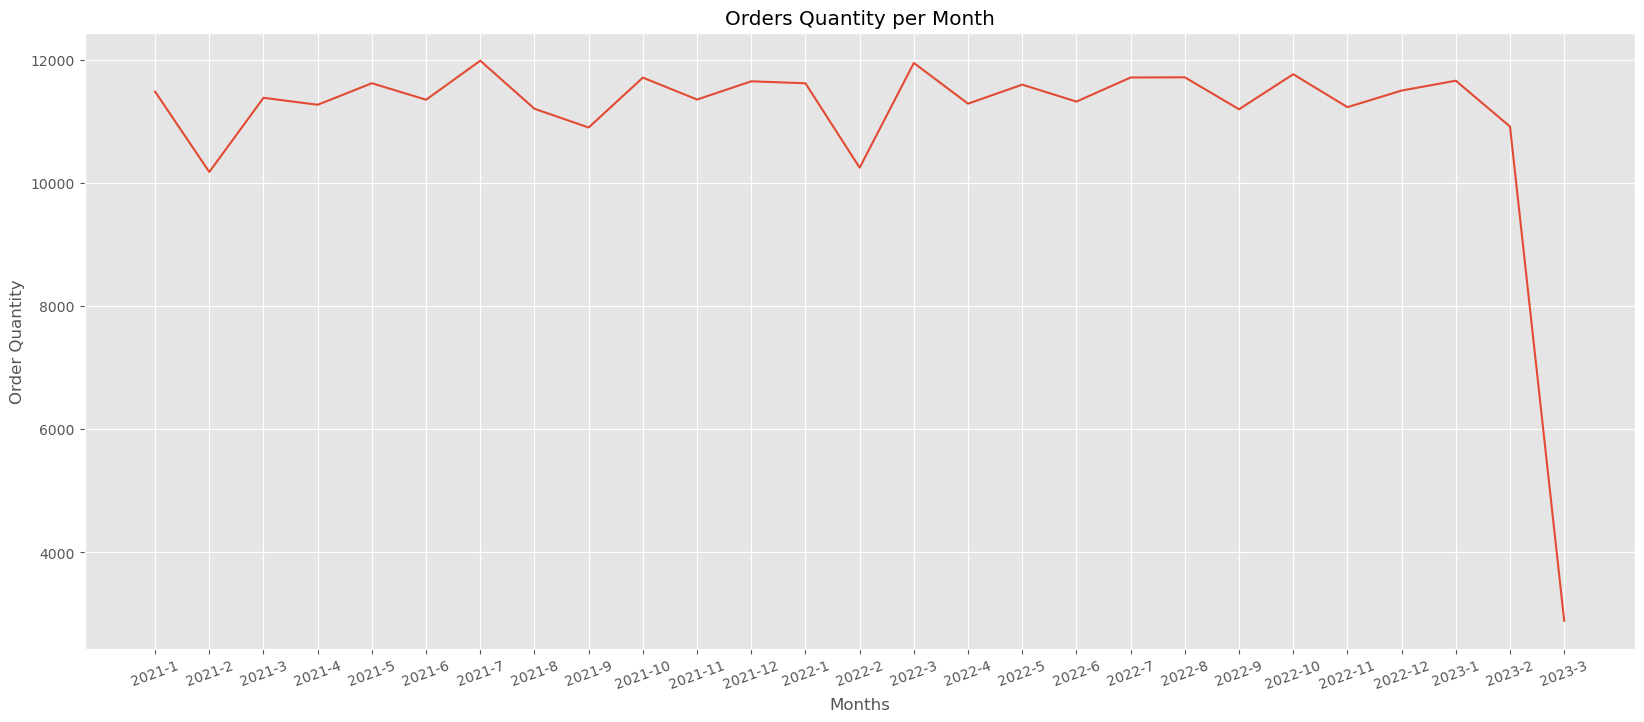

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=quantity_year,x='date',y='quantity')
plt.title('Orders Quantity per Month')
plt.xlabel('Months')
plt.ylabel('Order Quantity')
plt.xticks(rotation=20)
plt.show()

In [ ]:
income = df.groupby(['year','month'])['price'].sum().reset_index()
income.head()

,year,month,price
0,2021,1,2656422.78
1,2021,2,2358636.34
2,2021,3,2618434.14
3,2021,4,2558825.62
4,2021,5,2662369.93


In [ ]:
income['date'] = income['year'].astype(str)+ "-"+income['month'].astype(str)
income.head()

,year,month,price,date
0,2021,1,2656422.78,2021-1
1,2021,2,2358636.34,2021-2
2,2021,3,2618434.14,2021-3
3,2021,4,2558825.62,2021-4
4,2021,5,2662369.93,2021-5


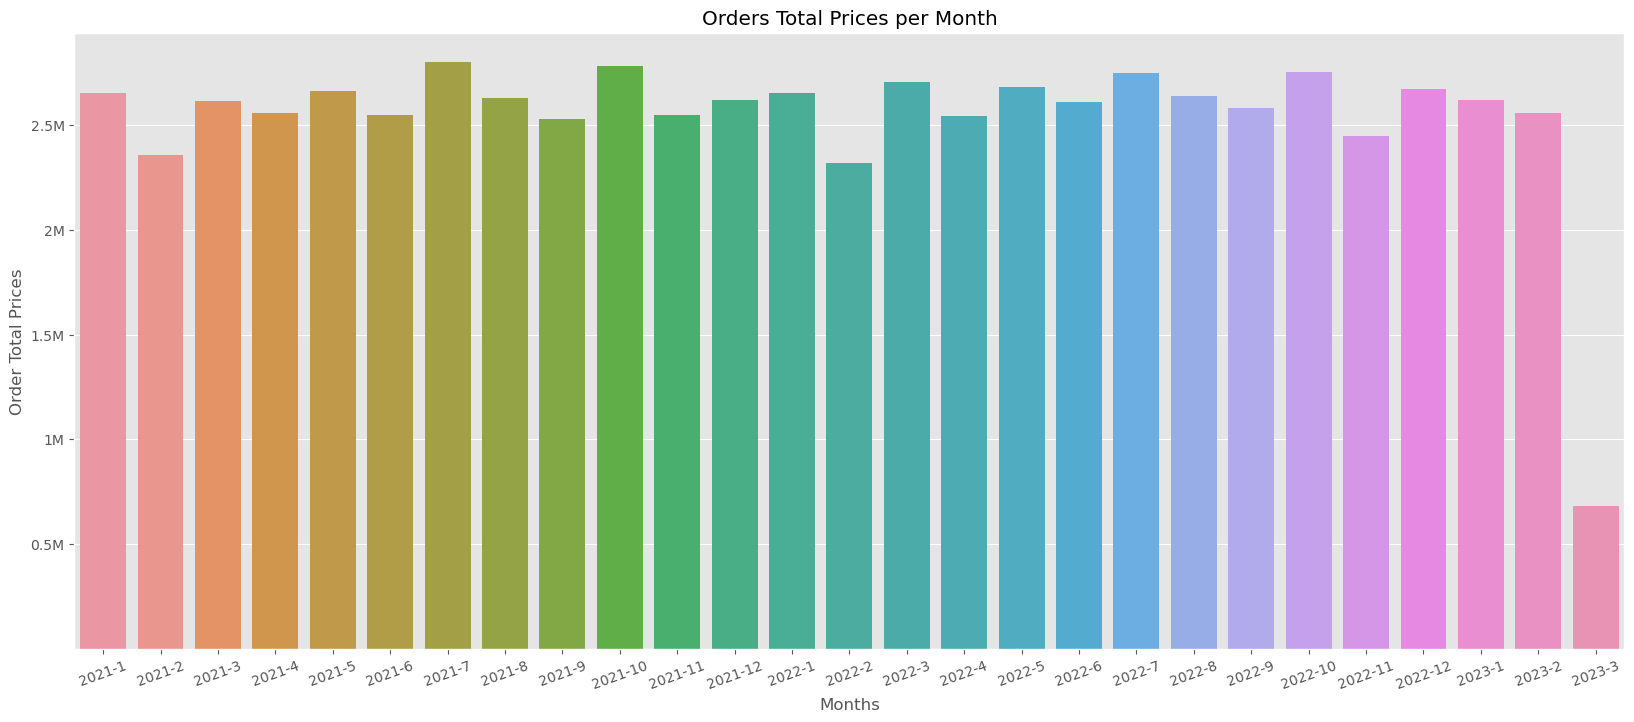

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=income,x='date',y='price')
ytick=[500000,1000000,1500000,2000000,2500000]
ylabels=['0.5M','1M','1.5M','2M','2.5M']
plt.yticks(ytick,ylabels)
plt.title('Orders Total Prices per Month')
plt.xlabel('Months')
plt.ylabel('Order Total Prices')
plt.xticks(rotation=20)
plt.show()

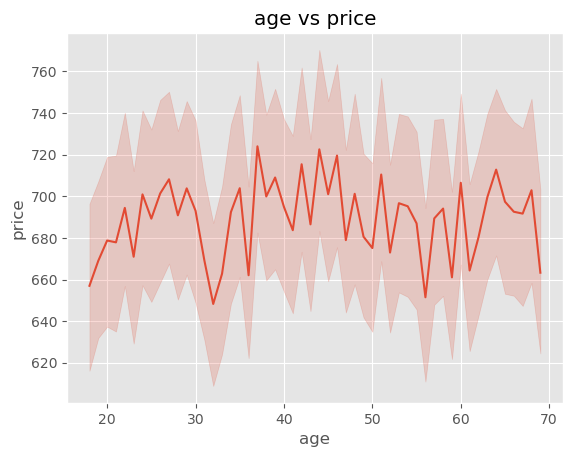

In [ ]:
sns.lineplot(data=data,x='age',y='price')
plt.title('age vs price')
plt.show()

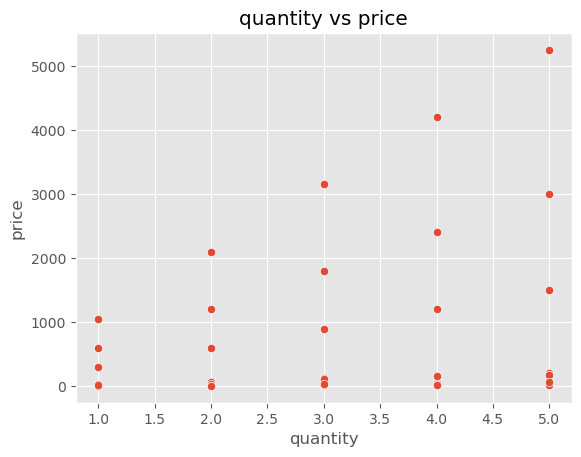

In [ ]:
sns.scatterplot(data=data,x='quantity',y='price')
plt.title('quantity vs price')
plt.show()

In [ ]:
mall = df.groupby(['shopping_mall','gender'])['shopping_mall'].value_counts().reset_index()
mall

,shopping_mall,gender,count
0,Cevahir AVM,Female,2940
1,Cevahir AVM,Male,2051
2,Emaar Square Mall,Female,2842
3,Emaar Square Mall,Male,1969
4,Forum Istanbul,Female,3016
5,Forum Istanbul,Male,1931
6,Istinye Park,Female,5874
7,Istinye Park,Male,3907
8,Kanyon,Female,11906
9,Kanyon,Male,7917


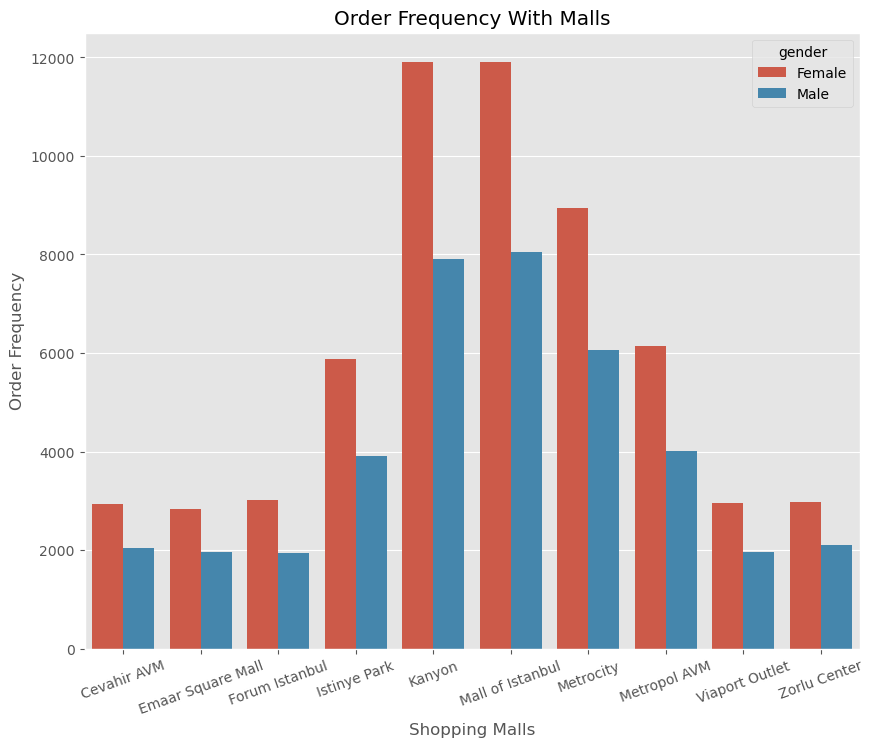

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=mall,x='shopping_mall',y='count',hue='gender')
plt.xlabel('Shopping Malls')
plt.ylabel('Order Frequency')
plt.xticks(rotation=20)
plt.title('Order Frequency With Malls')
plt.show()

What is the age distribution of male and female customers?

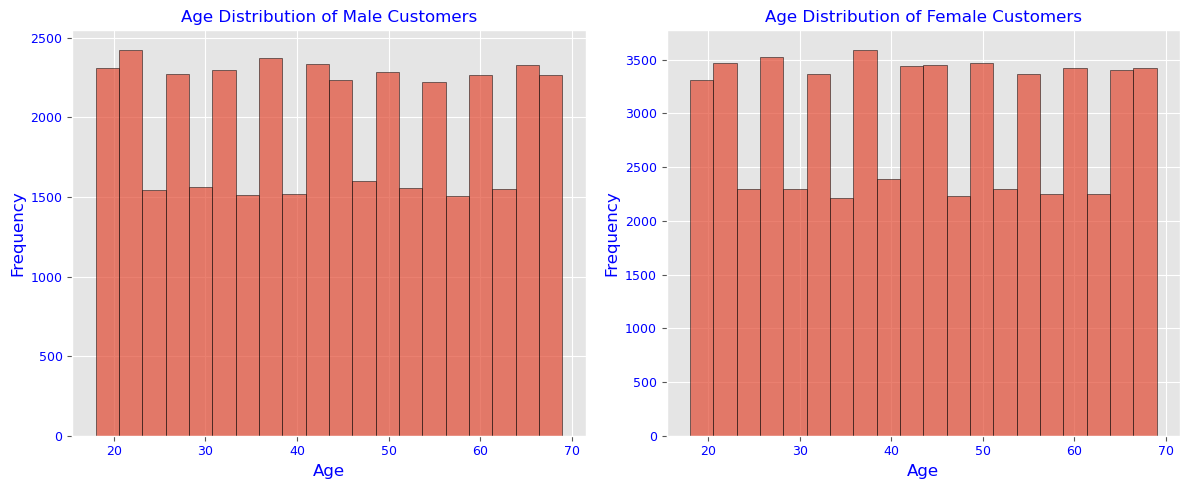

In [ ]:
#1. What is the age distribution of male and female customers?
# Male and female groups
male_data = data[data['gender'] == 'Male']
female_data = data[data['gender'] == 'Female']

# Histograms for male and female age distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(male_data['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Male Customers', color='blue',fontsize=12)
plt.xlabel('Age',color='blue',fontsize=12)
plt.ylabel('Frequency',color='blue',fontsize=12)
plt.tick_params(axis='x', which='both', labelsize=9, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=9, labelcolor='blue')

plt.subplot(1, 2, 2)
plt.hist(female_data['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Female Customers',color='blue',fontsize=12)
plt.xlabel('Age',color='blue',fontsize=12)
plt.ylabel('Frequency',color='blue',fontsize=12)

plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=9, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=9, labelcolor='blue')
plt.show()

Is there a significant difference between age of male and female customers

In [ ]:
#2. Is there a significant difference between age of male and female customers
H0 = "There is a significant age difference between male and female customers."
H1 = "There is no significant age difference between male and female customers."

# Male and female groups
male_data = data[data['gender'] == 'Male']['age']
female_data = data[data['gender'] == 'Female']['age']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(male_data, female_data, equal_var=False)

# Set significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print(H0)
else:
    print(H1)

There is no significant age difference between male and female customers.


Are there more male or female customers in each age group?

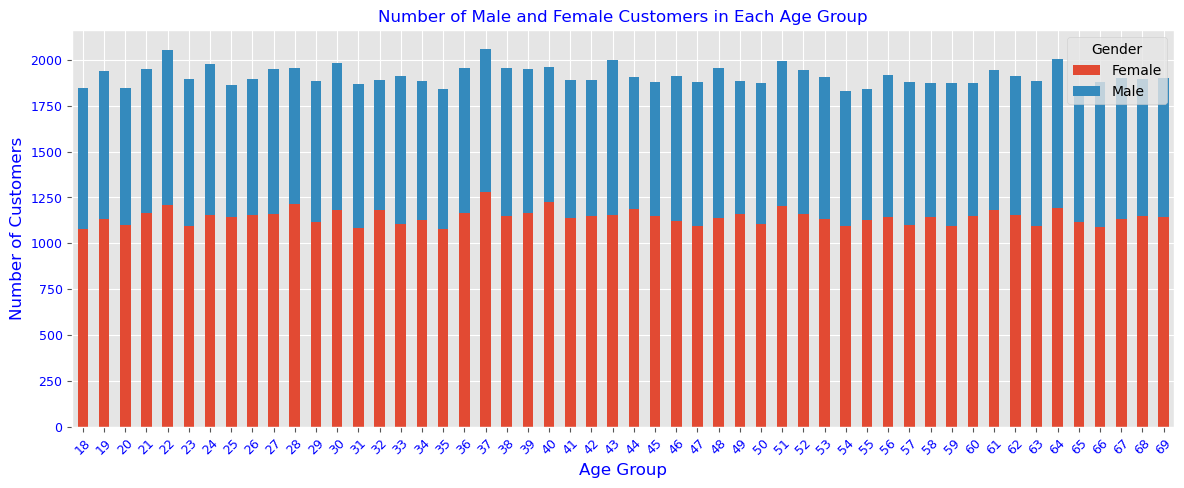

In [ ]:
#3. Are there more male or female customers in each age group?
# Group data by age and gender
age_gender_counts = df.groupby(['age', 'gender']).size().unstack()

# Plot stacked bar plot
age_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 5))
plt.title('Number of Male and Female Customers in Each Age Group', color='blue', fontsize=12)
plt.xlabel('Age Group',color='blue', fontsize=12)
plt.ylabel('Number of Customers',color='blue', fontsize=12)
plt.legend(title='Gender')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=9, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=9, labelcolor='blue')
plt.show()

How many new customers were acquired in the last quarter?

In [ ]:
#4. How many new customers were acquired in the last quarter?
end_date = datetime(2022, 12, 1)
start_date = end_date - timedelta(days=90)

# customers who made their first purchase within the last quarter
first_purchase_dates = df.groupby('customer_id')['invoice_date'].min()
new_customers_last_quarter = first_purchase_dates[
    (first_purchase_dates >= start_date) & (first_purchase_dates <= end_date)]

num_customers_acquired = len(new_customers_last_quarter)
print("Number of new customers acquired in the last quarter:", format(num_customers_acquired,','))

Number of new customers acquired in the last quarter: 11,338


What is the average age of customers who make high-value purchases?

In [ ]:
#5. What is the average age of customers who make high-value purchases?
#The assumption here is that 2000 or more is a high value purchase
# high-value purchases
high_value_threshold = 2000 
high_value_customers = data[data['total_revenue'] >= high_value_threshold]

# average age of customers making high-value purchases
average_age_high_value = high_value_customers['age'].mean()
average_age_high_value = round(average_age_high_value,2)

print("Average age of customers making high-value purchases:{} years".format(average_age_high_value))

Average age of customers making high-value purchases:43.49 years


In [ ]:
#6. What is the mean age of customers for each quartile of total sales
# total sales for each customer
data['total_revenue'] = data['quantity'] * data['price']
customer_total_sales = df.groupby('customer_id')['total_revenue'].sum()

# Customer quartiles
quartile_labels = ['Q1', 'Q2', 'Q3', 'Q4']
customer_total_sales_df = pd.DataFrame(customer_total_sales)
customer_total_sales_df['quartile'] = pd.qcut(customer_total_sales_df['total_revenue'], q=4, labels=quartile_labels)

customer_ages = data[['customer_id', 'age']].drop_duplicates()
customer_quartiles = customer_total_sales_df.merge(customer_ages, left_index=True, right_on='customer_id')

# mean age for each quartile
mean_age_per_quartile = customer_quartiles.groupby('quartile')['age'].mean().reset_index()

print("Mean age of customers for each quartile of total sales:\n")

print(mean_age_per_quartile)

Mean age of customers for each quartile of total sales:

  quartile   age
0       Q1 43.49
1       Q2 43.30
2       Q3 43.45
3       Q4 43.47


In [ ]:
#7. What is the average spending of customers aged 30-40?
# average spending for customers aged 30-40
customers_age_30_40 = data[(data['age'] >= 30) & (data['age'] <= 40)]
average_spending_30_40 = customers_age_30_40['total_revenue'].mean()
average_spending_30_40 = round(average_spending_30_40,2)

print(f"Average spending of customers aged 30-40: ${average_spending_30_40:,.2f}")

Average spending of customers aged 30-40: $2,509.64


In [ ]:
#8. Are there a# Calculate the correlation matrix
payment_methods_encoded = pd.get_dummies(data['payment_method'], prefix='payment')

data_with_encoded_payment = pd.concat([data, payment_methods_encoded], axis=1)

correlation_matrix = data_with_encoded_payment[['age', 'payment_Credit Card', 'payment_Debit Card', 'payment_Cash']].corr()

correlation_age_payment_method = correlation_matrix['age'][1:]

print("Correlation between customer age and payment methods:\n")

print(correlation_age_payment_method)


Correlation between customer age and payment methods:

payment_Credit Card    0.00
payment_Debit Card    -0.00
payment_Cash           0.00
Name: age, dtype: float64


In [ ]:
#9. Who are the top 10 customers in terms of lifetime spending?
# total spending for each customer
customer_total_spending = df.groupby('customer_id')['total_revenue'].sum().reset_index()

# get the top 10
top_10_customers = customer_total_spending.sort_values('total_revenue',ascending=False).head(10)
top_10_customers['total_revenue'] = top_10_customers['total_revenue'].apply(format_revenue_with_thousand_separator)
print("Top 10 customers in terms of lifetime spending:\n")
print(top_10_customers)

Top 10 customers in terms of lifetime spending:

      customer_id total_revenue
11798     C137763    $26,250.00
88377     C699580    $26,250.00
3332      C110600    $26,250.00
3340      C110625    $26,250.00
34854     C211345    $26,250.00
12314     C139344    $26,250.00
88400     C700083    $26,250.00
60015     C291511    $26,250.00
60052     C291627    $26,250.00
20130     C164347    $26,250.00


In [ ]:
#10. What is the average spending of customers who shop in the shopping malls?

# average spending for customers in the specific malls

average_spending_malls = \
            df.groupby('shopping_mall')['total_revenue'].mean().reset_index()

average_spending_malls['total_revenue'] = \
            average_spending_malls['total_revenue'].apply(format_revenue_with_thousand_separator)

average_spending_malls = average_spending_malls.sort_values('total_revenue',ascending=False)

print("Average spending of customers in the shopping malls:\n")
print(average_spending_malls)

Average spending of customers in the shopping malls:

       shopping_mall total_revenue
1  Emaar Square Mall     $2,578.69
5   Mall of Istanbul     $2,550.89
4             Kanyon     $2,550.28
8     Viaport Outlet     $2,548.10
9       Zorlu Center     $2,542.08
0        Cevahir AVM     $2,533.59
3       Istinye Park     $2,517.01
7       Metropol AVM     $2,497.78
2     Forum Istanbul     $2,487.15
6          Metrocity     $2,485.03


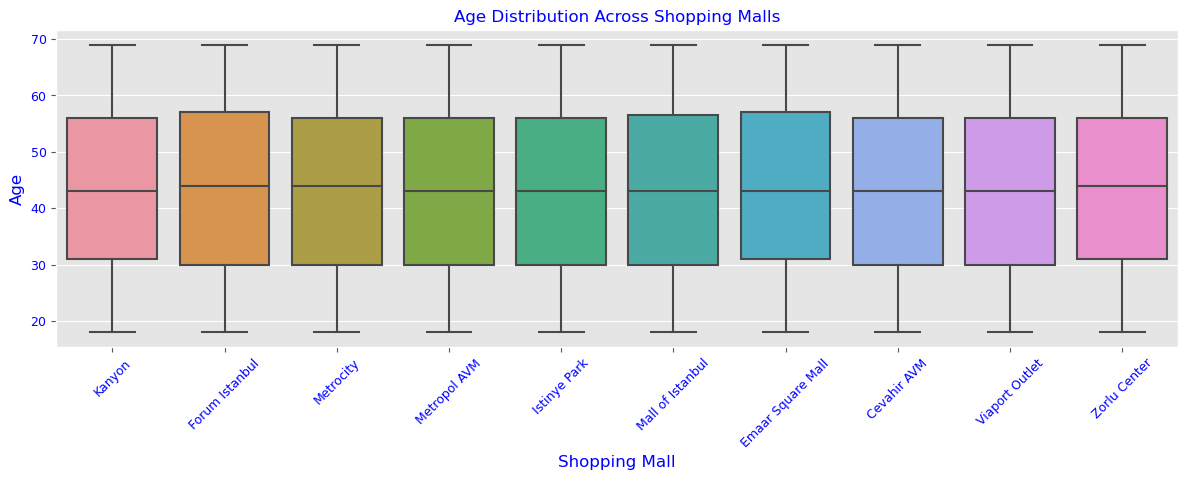

In [ ]:
#11. Are there any noticeable patterns in the distribution of customer ages across shopping malls?
# age distribution across shopping malls
plt.figure(figsize=(12, 5)) 

sns.boxplot(x='shopping_mall', y='age', data=data)
plt.title('Age Distribution Across Shopping Malls', color='blue', fontsize=12)
plt.xlabel('Shopping Mall',color='blue', fontsize=12)
plt.ylabel('Age',color='blue', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=9, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=9, labelcolor='blue')
plt.show()

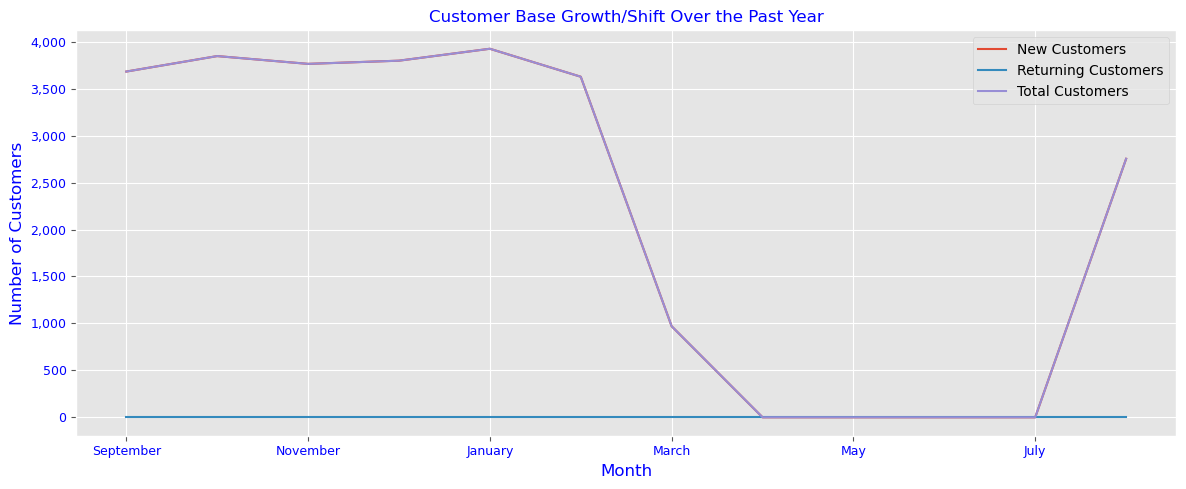

In [ ]:
#12. How has the customer base grown or shifted over the past year?
# data for the past year
end_date = pd.to_datetime('2023-08-10')
start_date = end_date - pd.DateOffset(years=1)

past_year_data = data[(data['invoice_date'] >= start_date) & (data['invoice_date'] <= end_date)]

monthly_customer_counts = past_year_df.groupby(['invoice_month', 'customer_id']).size().reset_index(name='count')

# month order
month_order = [
    'September', 'October', 'November', 'December', 'January', 'February',
    'March', 'April', 'May', 'June', 'July', 'August']

monthly_customer_counts['invoice_month'] = pd.Categorical(monthly_customer_counts['invoice_month'], 
                                categories=month_order, ordered=True)

# new and returning customers for each month
customer_acquisition = monthly_customer_counts.groupby('invoice_month')['customer_id'].nunique()
customer_retention = monthly_customer_counts.groupby('invoice_month').apply(lambda x: (x['count'] > 1).sum())

# total customers in each month (new + returning)
total_customers = customer_acquisition + customer_retention

# Plot growth/shift of the customer base over the past year
plt.figure(figsize=(12, 5))

customer_acquisition.plot(label='New Customers')
customer_retention.plot(label='Returning Customers')
total_customers.plot(label='Total Customers')

plt.title('Customer Base Growth/Shift Over the Past Year',color='blue', fontsize=12)
plt.xlabel('Month',color='blue', fontsize=12)
plt.ylabel('Number of Customers',color='blue', fontsize=12)
plt.legend()
plt.xticks(rotation=0)

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=9, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=9, labelcolor='blue')
plt.show()

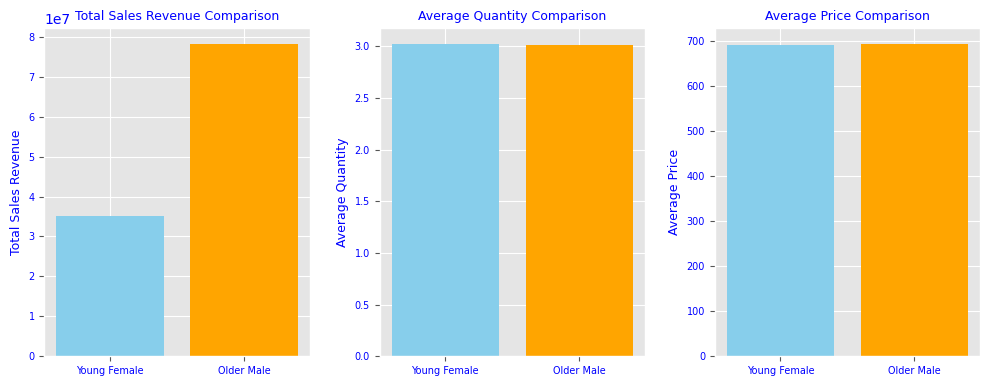

In [ ]:
#13. How do the purchasing patterns of young female customers differ from those of older male customers?
# young female customers & old male customers
young_female_data = data[(data['age'] < 30) & (data['gender'] == 'Female')]
older_male_data = data[(data['age'] >= 30) & (data['gender'] == 'Male')]

# total sales revenue for young female and older male customers
total_revenue_young_female = young_female_data['total_revenue'].sum()
total_revenue_older_male = older_male_data['total_revenue'].sum()

# average quantity and average price for each group
average_quantity_young_female = young_female_data['quantity'].mean()
average_price_young_female = young_female_data['price'].mean()
average_quantity_older_male = older_male_data['quantity'].mean()
average_price_older_male = older_male_data['price'].mean()

# bar plots to compare purchasing patterns
plt.figure(figsize=(10, 4))

# Total sales revenue comparison
plt.subplot(1, 3, 1)
plt.bar(['Young Female', 'Older Male'], [total_revenue_young_female, total_revenue_older_male], color=['skyblue', 'orange'])
plt.title("Total Sales Revenue Comparison",color='blue', fontsize=9)
plt.ylabel("Total Sales Revenue",color='blue', fontsize=9)
plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=7, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=7, labelcolor='blue')

# Average quantity comparison
plt.subplot(1, 3, 2)
plt.bar(['Young Female', 'Older Male'], [average_quantity_young_female, average_quantity_older_male], color=['skyblue', 'orange'])
plt.title("Average Quantity Comparison", color='blue', fontsize=9)
plt.ylabel("Average Quantity",color='blue', fontsize=9)
plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=7, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=7, labelcolor='blue')

# Average price comparison
plt.subplot(1, 3, 3)
plt.bar(['Young Female', 'Older Male'], [average_price_young_female, average_price_older_male], color=['skyblue', 'orange'])
plt.title("Average Price Comparison",color='blue', fontsize=9)
plt.ylabel("Average Price",color='blue', fontsize=9)

plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=7, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=7, labelcolor='blue')
plt.show()

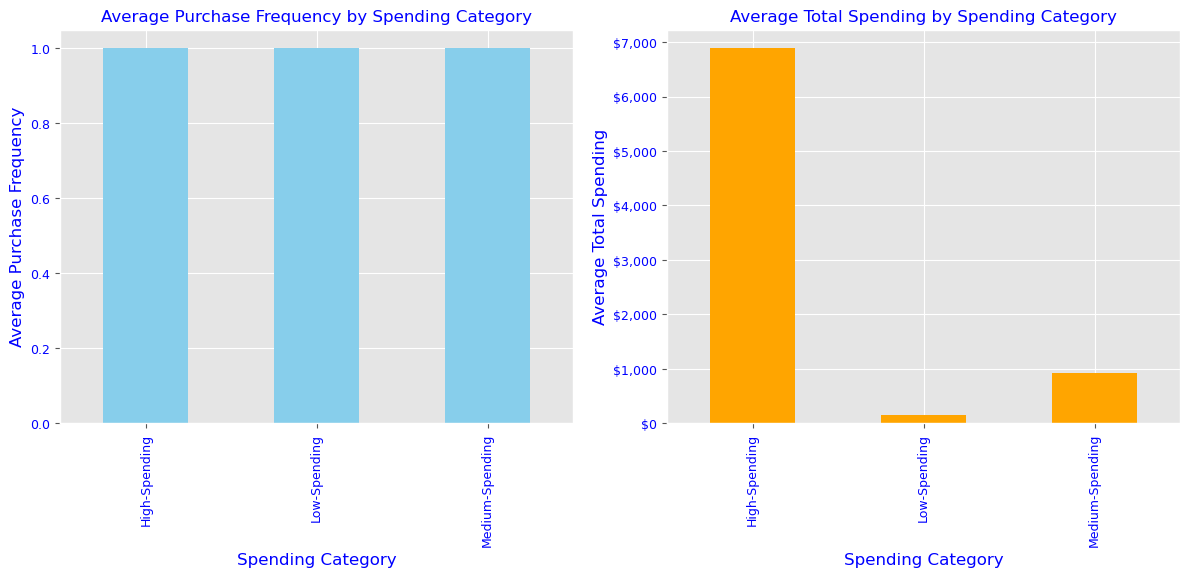

In [ ]:
#14. Are there differences in purchase frequency and total spending between high-spending and low-spending customers?
# total spending and purchase frequency for each customer
customer_data = df.groupby('customer_id').agg(
                total_spending=('total_revenue', 'sum'),
                purchase_frequency=('invoice_no', 'nunique')
            ).reset_index()

# high-spending and low-spending customer thresholds

high_spending_threshold = 2000  
low_spending_threshold = 500  

# high-spending, medium-spending, and low-spending customers
def categorize_spending(row):
    if row['total_spending'] >= high_spending_threshold:
        return 'High-Spending'
    elif row['total_spending'] <= low_spending_threshold:
        return 'Low-Spending'
    else:
        return 'Medium-Spending'

customer_data['spending_category'] = customer_df.apply(categorize_spending, axis=1)

# average purchase frequency for each spending category
avg_purchase_frequency = customer_df.groupby('spending_category')['purchase_frequency'].mean()

# average total spending for each spending category
avg_total_spending = customer_df.groupby('spending_category')['total_spending'].mean()

# bar plots to visualize the differences
plt.figure(figsize=(12, 6))

# Purchase frequency comparison
plt.subplot(1, 2, 1)
avg_purchase_frequency.plot(kind='bar', color='skyblue')
plt.title("Average Purchase Frequency by Spending Category",color='blue', fontsize=12)
plt.xlabel("Spending Category",color='blue', fontsize=12)
plt.ylabel("Average Purchase Frequency",color='blue', fontsize=12)
plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=9, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=9, labelcolor='blue')

# Total spending comparison
plt.subplot(1, 2, 2)
avg_total_spending.plot(kind='bar', color='orange')
plt.title("Average Total Spending by Spending Category",color='blue', fontsize=12)
plt.xlabel("Spending Category",color='blue', fontsize=12)
plt.ylabel("Average Total Spending",color='blue', fontsize=12)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=9, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=9, labelcolor='blue')
plt.show()

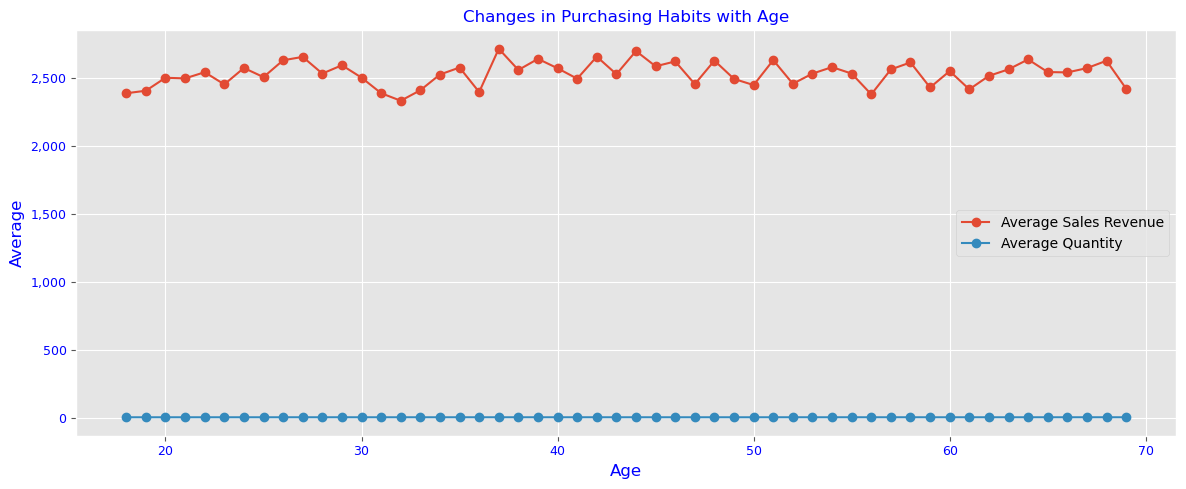

In [ ]:
#15 Calculate the average sales revenue and quantity for each age group
age_group_data = df.groupby('age')[['total_revenue', 'quantity']].mean().reset_index()

# Create a line plot to visualize the changes in purchasing habits with age
plt.figure(figsize=(12, 5))
plt.plot(age_group_data['age'], age_group_data['total_revenue'], marker='o', label='Average Sales Revenue')
plt.plot(age_group_data['age'], age_group_data['quantity'], marker='o', label='Average Quantity')
plt.title("Changes in Purchasing Habits with Age",color='blue', fontsize=12)
plt.xlabel("Age",color='blue', fontsize=12)
plt.ylabel("Average",color='blue', fontsize=12)
plt.legend()
plt.grid(True)

# Format the y-axis to display commas
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=9, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=9, labelcolor='blue')
plt.show()

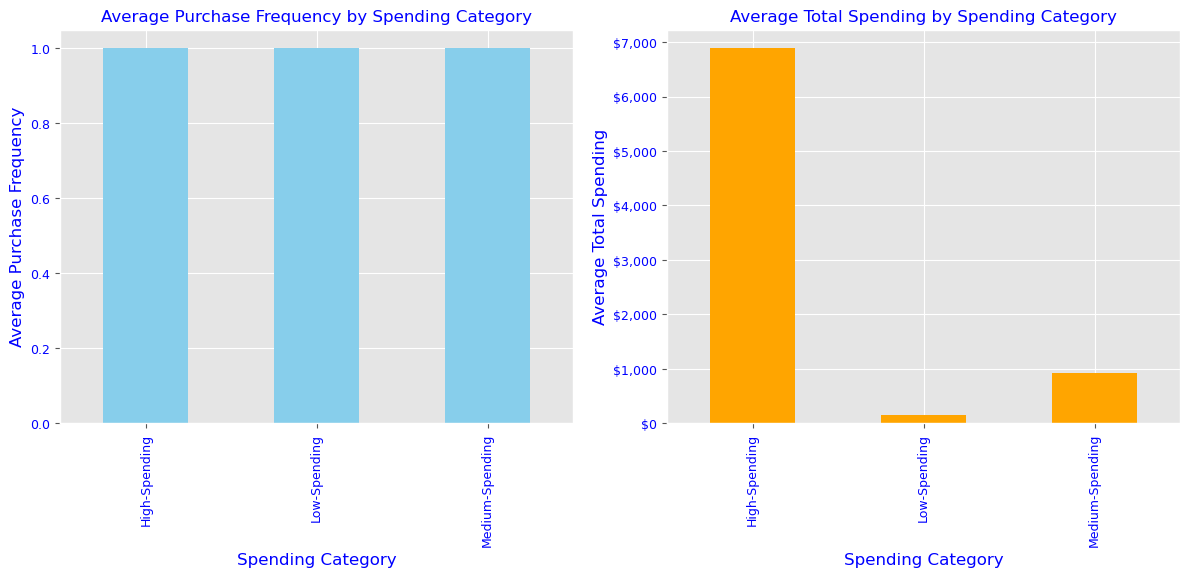

In [ ]:
#15. Are there differences in purchase frequency and total spending between high-spending and low-spending customers?

# total spending and purchase frequency for each customer
customer_data = df.groupby('customer_id').agg(
                total_spending=('total_revenue', 'sum'),
                purchase_frequency=('invoice_no', 'nunique')
            ).reset_index()

# high-spending and low-spending customer thresholds

high_spending_threshold = 2000  
low_spending_threshold = 500  

# high-spending, medium-spending, and low-spending customers
def categorize_spending(row):
    if row['total_spending'] >= high_spending_threshold:
        return 'High-Spending'
    elif row['total_spending'] <= low_spending_threshold:
        return 'Low-Spending'
    else:
        return 'Medium-Spending'

customer_data['spending_category'] = customer_df.apply(categorize_spending, axis=1)

# average purchase frequency for each spending category
avg_purchase_frequency = customer_df.groupby('spending_category')['purchase_frequency'].mean()

# average total spending for each spending category
avg_total_spending = customer_df.groupby('spending_category')['total_spending'].mean()

# bar plots to visualize the differences
plt.figure(figsize=(12, 6))

# Purchase frequency comparison
plt.subplot(1, 2, 1)
avg_purchase_frequency.plot(kind='bar', color='skyblue')
plt.title("Average Purchase Frequency by Spending Category",color='blue', fontsize=12)
plt.xlabel("Spending Category",color='blue', fontsize=12)
plt.ylabel("Average Purchase Frequency",color='blue', fontsize=12)
plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=9, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=9, labelcolor='blue')

# Total spending comparison
plt.subplot(1, 2, 2)
avg_total_spending.plot(kind='bar', color='orange')
plt.title("Average Total Spending by Spending Category",color='blue', fontsize=12)
plt.xlabel("Spending Category",color='blue', fontsize=12)
plt.ylabel("Average Total Spending",color='blue', fontsize=12)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()
plt.tick_params(axis='x', which='both', labelsize=9, labelcolor='blue')
plt.tick_params(axis='y', which='both', labelsize=9, labelcolor='blue')
plt.show()

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  month           99457 non-null  int32         
 11  year            99457 non-null  int32         
 12  invoice_year    99457 non-null  int32         
 13  invoice_month   99457 non-null  object        
 14  total_revenue   99457 non-null  float64       
dtypes:

Customers total spending prediction
Next section we will do a customer spending prediction model that can be used for total revenue prediction in case business owners would run an advertisement campaign targeting certain customer profiles.

In [116]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [122]:
# New column with age group
age_groups = [18, 24, 34, 44, 54, 64, 70]
labels = ['18-24','25-34','35-44','45-54','55-64','65-70']
df['age_group'] = pd.cut(df['age'],bins=age_groups, labels =labels)
age_cats = pd.CategoricalDtype(['18-24','25-34','35-44','45-54','55-64','65-70'], ordered=True)
df['age_group'] = df['age_group'].astype(age_cats)
df.head()

#Seems like now our data has all necessary columns, correct datatypes, no duplicates or 
#missing entires. And ready for further analysis

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,invoice_year,invoice_month,total_revenue,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022,2022,August,7502.00,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021,2021,December,5401.53,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021,2021,November,300.08,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021,2021,May,15004.25,65-70
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021,2021,October,242.40,45-54


In [142]:
# Choose relevant columns for predictions
df_model = df[['gender', 'age_group', 'category', 'price', 'total_revenue']]

#Get dummy data
df_dum = pd.get_dummies(df_model)
df_dum.head()

,price,total_revenue,gender_Female,gender_Male,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65-70,category_Books,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,category_Technology,category_Toys
0,1500.40,7502.00,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,1800.51,5401.53,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False
2,300.08,300.08,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False
3,3000.85,15004.25,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
4,60.60,242.40,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False


In [143]:
df_model.head()

,gender,age_group,category,price,total_revenue
0,Female,25-34,Clothing,1500.40,7502.00
1,Male,18-24,Shoes,1800.51,5401.53
2,Male,18-24,Clothing,300.08,300.08
3,Female,65-70,Shoes,3000.85,15004.25
4,Female,45-54,Books,60.60,242.40


In [138]:
df_dum.corr()

,price,total_revenue,gender_Female,gender_Male,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65-70,category_Books,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,category_Technology,category_Toys
price,1.00,0.96,-0.00,0.00,-0.00,-0.00,0.01,0.00,-0.00,0.00,-0.16,0.16,-0.25,-0.30,0.40,-0.16,0.60,-0.21
total_revenue,0.96,1.00,-0.00,0.00,-0.00,-0.00,0.01,0.00,-0.00,0.00,-0.13,0.13,-0.21,-0.24,0.33,-0.13,0.49,-0.17
gender_Female,-0.00,-0.00,1.00,-1.00,-0.01,0.00,0.00,-0.00,0.00,-0.00,-0.01,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
gender_Male,0.00,0.00,-1.00,1.00,0.01,-0.00,-0.00,0.00,-0.00,0.00,0.01,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
age_group_18-24,-0.00,-0.00,-0.01,0.01,1.00,-0.18,-0.18,-0.18,-0.18,-0.12,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
age_group_25-34,-0.00,-0.00,0.00,-0.00,-0.18,1.00,-0.24,-0.24,-0.24,-0.16,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
age_group_35-44,0.01,0.01,0.00,-0.00,-0.18,-0.24,1.00,-0.24,-0.24,-0.16,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,-0.00
age_group_45-54,0.00,0.00,-0.00,0.00,-0.18,-0.24,-0.24,1.00,-0.24,-0.16,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
age_group_55-64,-0.00,-0.00,0.00,-0.00,-0.18,-0.24,-0.24,-0.24,1.00,-0.16,0.00,0.00,0.00,-0.00,0.00,0.00,-0.01,-0.00
age_group_65-70,0.00,0.00,-0.00,0.00,-0.12,-0.16,-0.16,-0.16,-0.16,1.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00


In [160]:
# Train test split
X = df_dum.drop('total_revenue', axis =1)
y = df_dum.total_revenue.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [161]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression()

In [162]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

0.9807393318558775


In [164]:
score = reg.score(X_train, y_train)
print(score)

0.9806494440616605


In [165]:
score = reg.score(X, y)
print(score)

0.980667038452025
